In [70]:
import numpy as np
import h5py

import matplotlib.pyplot as plt

from noise_correlations.plot import plot_ellipses

In [61]:
fname = '/storage/data_from_mathew/200114_fov1_data.mat'
with h5py.File(fname, 'r') as f:
    print(list(f.keys()))
    y = np.squeeze(f['stimDirs'][:]).astype(int)
    X = f['stimDF'][:]
    tuned = np.squeeze(f['dsRois'][:]).astype(int) - 1
    fs = np.squeeze(f['fs'][:])
print(y.shape)
print(X.shape)
angles = np.unique(y)

['dF', 'dsRois', 'fs', 'stimDF', 'stimDirs', 'stimTiming']
(684,)
(832, 684, 15)


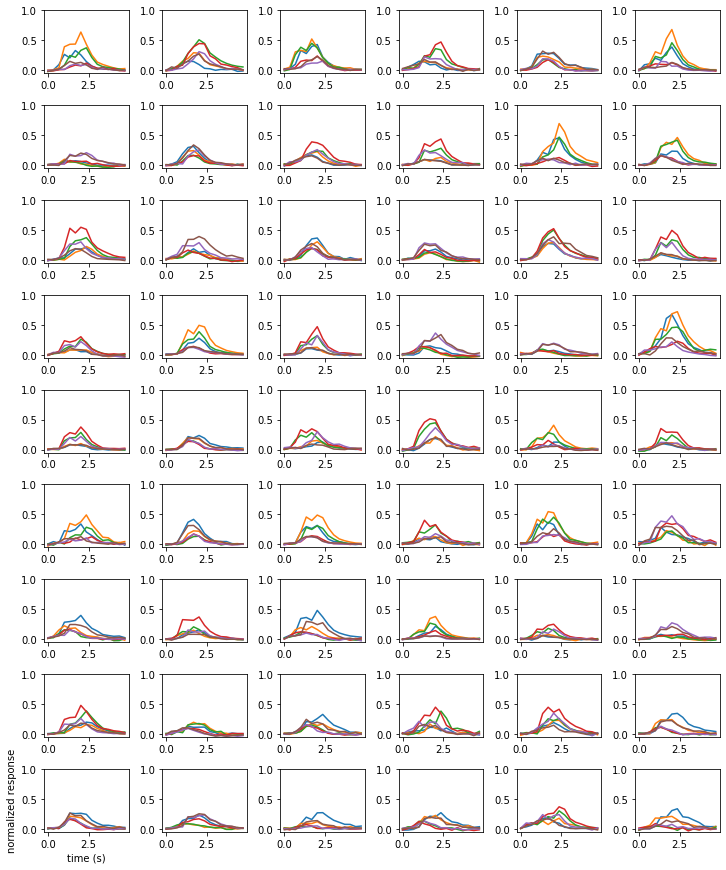

In [68]:
fig, axes = plt.subplots(9, 6, figsize=(10, 12))
maxval = X.mean(axis=1).max()
t = np.arange(X.shape[-1]) / fs
for ii, idx in enumerate(tuned):
    for angle in np.unique(y):
        axes.ravel()[ii].plot(t, X[idx, y == angle].mean(axis=0) / maxval)
        axes.ravel()[ii].set_ylim(-.05, 1)
fig.tight_layout()
axes[-1, 0].set_xlabel('time (s)')
axes[-1, 0].set_ylabel('normalized response')
plt.savefig('across_directions.pdf')
plt.show()

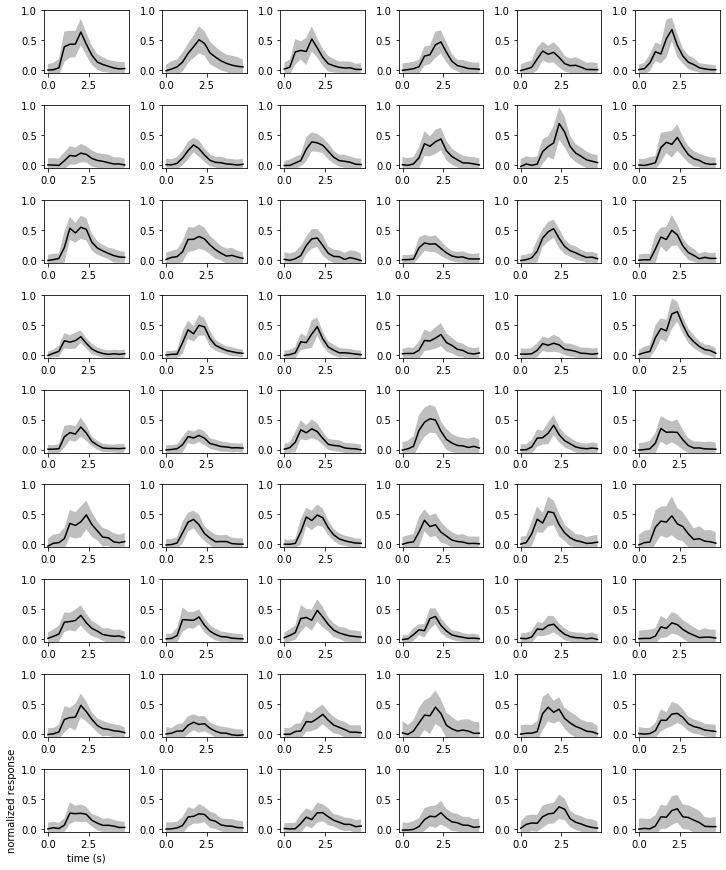

In [69]:
fig, axes = plt.subplots(9, 6, figsize=(10, 12))
maxval = X.mean(axis=1).max()
t = np.arange(X.shape[-1]) / fs
for ii, idx in enumerate(tuned):
    Xa = np.zeros(angles.size)
    for jj, angle in enumerate(angles):
        Xa[jj] = X[idx, y == angle].max(axis=-1).mean()
    maxidx = Xa.argmax()
    mean = X[idx, y == angles[maxidx]].mean(axis=0) / maxval
    std = X[idx, y == angles[maxidx]].std(axis=0) / maxval
    axes.ravel()[ii].plot(t, mean, c='k')
    axes.ravel()[ii].fill_between(t, mean - std, mean + std, fc='gray', alpha=.5)
    axes.ravel()[ii].set_ylim(-.05, 1)
fig.tight_layout()
axes[-1, 0].set_xlabel('time (s)')
axes[-1, 0].set_ylabel('normalized response')
plt.savefig('across_trials.pdf')
plt.show()

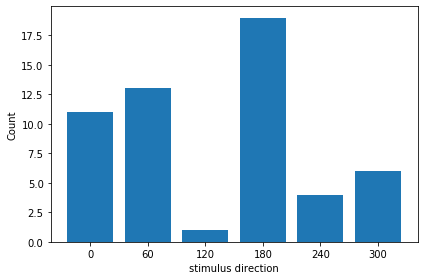

In [108]:
Xp = X[tuned]
Xa = np.zeros((Xp.shape[0], angles.size))
for ii, angle in enumerate(angles):
    Xa[:, ii] = Xp[:, y == angle].max(axis=-1).mean(axis=-1)
max_idx = np.argmax(Xa, axis=1)
_, counts = np.unique(max_idx, return_counts=True)

plt.bar(np.arange(6), counts, tick_label=angles)
plt.xlabel('stimulus direction')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('tuning_count.pdf')
plt.show()

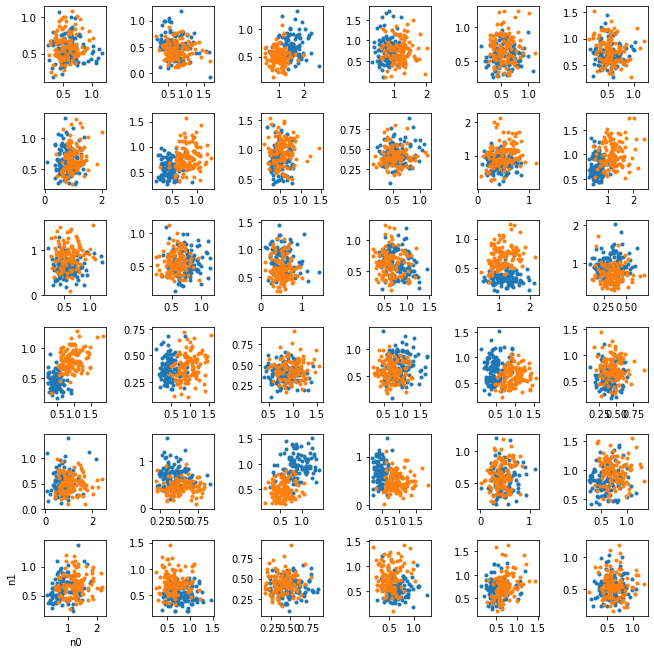

In [77]:
fig, axes = plt.subplots(6, 6, figsize=(9, 9))

Xmax = X.max(axis=-1)

for ii in range(axes.size):
    n0, n1 = np.random.permutation(54)[:2]
    n0, n1 = tuned[n0], tuned[n1]
    angle0 = np.random.choice(angles)
    angle1 = (angle0 + 60) % 360
    x0 = Xmax[[n0, n1]][:, y == angle0]
    mu0 = x0.mean(axis=-1)
    cov0 = np.cov(x0)
    x1 = Xmax[[n0, n1]][:, y == angle1]
    mu1 = x1.mean(axis=-1)
    cov1 = np.cov(x1)
    axes.ravel()[ii].scatter(x0[0], x0[1], marker='.')
    axes.ravel()[ii].scatter(x1[0], x1[1], marker='.')

fig.tight_layout()
axes[-1, 0].set_xlabel('n0')
axes[-1, 0].set_ylabel('n1')
plt.show()

In [86]:
corrs = []
for ii, idx0 in enumerate(tuned):
    for idx1 in tuned[ii+1:]:
        for kk, angle0 in enumerate(angles):
            corrs.append(np.corrcoef(Xmax[idx0, y == angle0], Xmax[idx1, y == angle0])[0, 1])

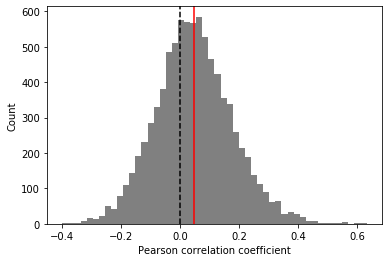

In [97]:
plt.hist(corrs, bins=50, fc='gray')
plt.axvline(0, ls='--', c='k')
plt.axvline(np.mean(corrs), c='r')
plt.xlabel('Pearson correlation coefficient')
plt.ylabel('Count')
plt.savefig('correlations.pdf')